In [1]:
#read in multiple text file
import glob
list_of_files = glob.glob('/Users/dgszabo/Dropbox/Dani/Articles/CG codes/Test codes/pdftotext/*.txt')
#import to tokenize immediately
import nltk
from nltk import word_tokenize
#create all_tokens list
all_tokens = []
for file_name in list_of_files:
    with open(file_name) as file:
        testtext = file.read()
        text_tokens = word_tokenize(testtext)
        print(len(text_tokens))
        all_tokens.extend(text_tokens)
print(len(all_tokens))

11349
27779
7812
46940


In [2]:
all_tokens

['RECOMMENDATIONS',
 'ON',
 'CORPORATE',
 'GOVERNANCE',
 'COMMITTEE',
 'ON',
 'CORPORATE',
 'GOVERNANCE',
 'MAY',
 '2013',
 'Updated',
 'November',
 '2014',
 'C',
 'O',
 'R',
 'P',
 'O',
 'R',
 'AT',
 'E',
 'GOVERNANCE',
 'RECOMMENDATIONS',
 'ON',
 'CORPORATE',
 'GOVERNANCE',
 'MAY',
 '2013',
 '1',
 'CONTENTS',
 'Preface',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '.',
 '3',
 'Introduction',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...'

In [556]:
#create lowercase
all_tokens_lc = [word.lower() for word in all_tokens]

In [557]:
#clean stopwords
from nltk.corpus import stopwords
all_tokens_clean1 = [word for word in all_tokens_lc if word not in stopwords.words('english')]

In [558]:
#get rid of punctuations
punctuation = [".", ";", ",", "'", '"', "!", "’", "%", ":", "&", "(", ")", '"', "#", "$", "'",
               "*", "+", "-", "/", "<", "=", ">", "?", "@", "[", "]", "\\", "^", "_", "`", "{",
               "|", "}", "~", '•', "...", "–", '“', '”']

all_tokens_clean2 = [word for word in all_tokens_clean1 if word not in punctuation]

In [559]:
#get rid of years & other clutter
years = ["2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]

all_tokens_clean3 = [word for word in all_tokens_clean2 if word not in years]

clutter = ["j+", "1", "2", "also", "bang", "olufsen", "dfds", "simcorp", "gabriel", "jyske", 
           "genmab", "per", "'s", "rockwool", "a/s", "\uf0b7", "firstfarms", "royal", "unibrew", 
           "one", "eurosearch", "\x9a\x01", "within", "including", "alk", "arkil", "0", "3",
           "kvistgård", "harboe", "s\x00", "2009/10", "4", "10", "--", "∙∙", "page", "6", "5",
           "2014/15", "zealand", "matas", "h+h", "sydbank", "2013/14", "2017", "ion", "vestjyskbank",
           "bavarian", "neurosearch"]

all_tokens_clean4 = [word for word in all_tokens_clean3 if word not in clutter]

In [560]:
#word frequencies
word_frequency = nltk.FreqDist(all_tokens_clean4)

#Print out the most common 50

In [561]:
#writing dictionary
test_list = word_frequency.most_common(100)

keys_list = []
for element in test_list:
    keys_list.append(element[0])
    
value_list = []
for element in test_list:
    value_list.append(element[1])

dictionary = dict(zip(keys_list, value_list))

In [562]:
#create csv file
import csv
with open('2016.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(keys_list)
    writer.writerow(value_list)

In [530]:
#create pandas dataframe
import pandas as pd
df = pd.DataFrame(keys_list)
df.columns = ['Term']
df["2007"] = value_list
df

,Term,2007
0,group,416
1,environmental,400
2,employees,369
3,company,342
4,csr,282
5,environment,278
6,report,276
7,work,264
8,management,262
9,business,262


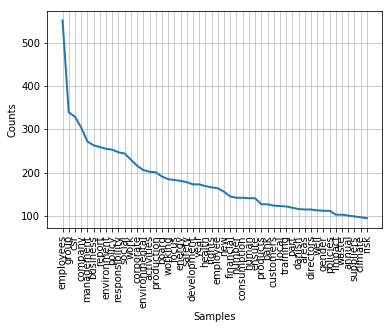

In [479]:
word_frequency.plot(50, cumulative=False)